In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [10]:
fair_probs = torch.ones([6]) / 6
print(fair_probs)
multinomial.Multinomial(1, fair_probs).sample()

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([1., 0., 0., 0., 0., 0.])

In [7]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 4., 0., 1., 2.])

In [8]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1650, 0.1720, 0.1640, 0.1630, 0.1670, 0.1690])

/Users/lisi/miniconda3/envs/d2l/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lisi/miniconda3/envs/d2l/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lisi/miniconda3/envs/d2l/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lisi/miniconda3/envs/d2l/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lisi/miniconda3/envs/d2l/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/lisi/miniconda3/envs/d2l/lib/python

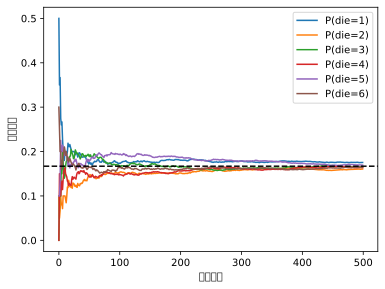

In [11]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('实验次数')
d2l.plt.gca().set_ylabel('估算概率')
d2l.plt.legend();